In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
# prompt: load the dataset "housing.csv"
data = pd.read_csv('housing.csv')
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data["total_bedrooms"] = data["total_bedrooms"].fillna(data["total_bedrooms"].median())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data = pd.get_dummies(data, columns=["ocean_proximity"], drop_first=True)

In [ ]:
#X = data.drop(columns='median_house_value')
#y = data['median_house_value']

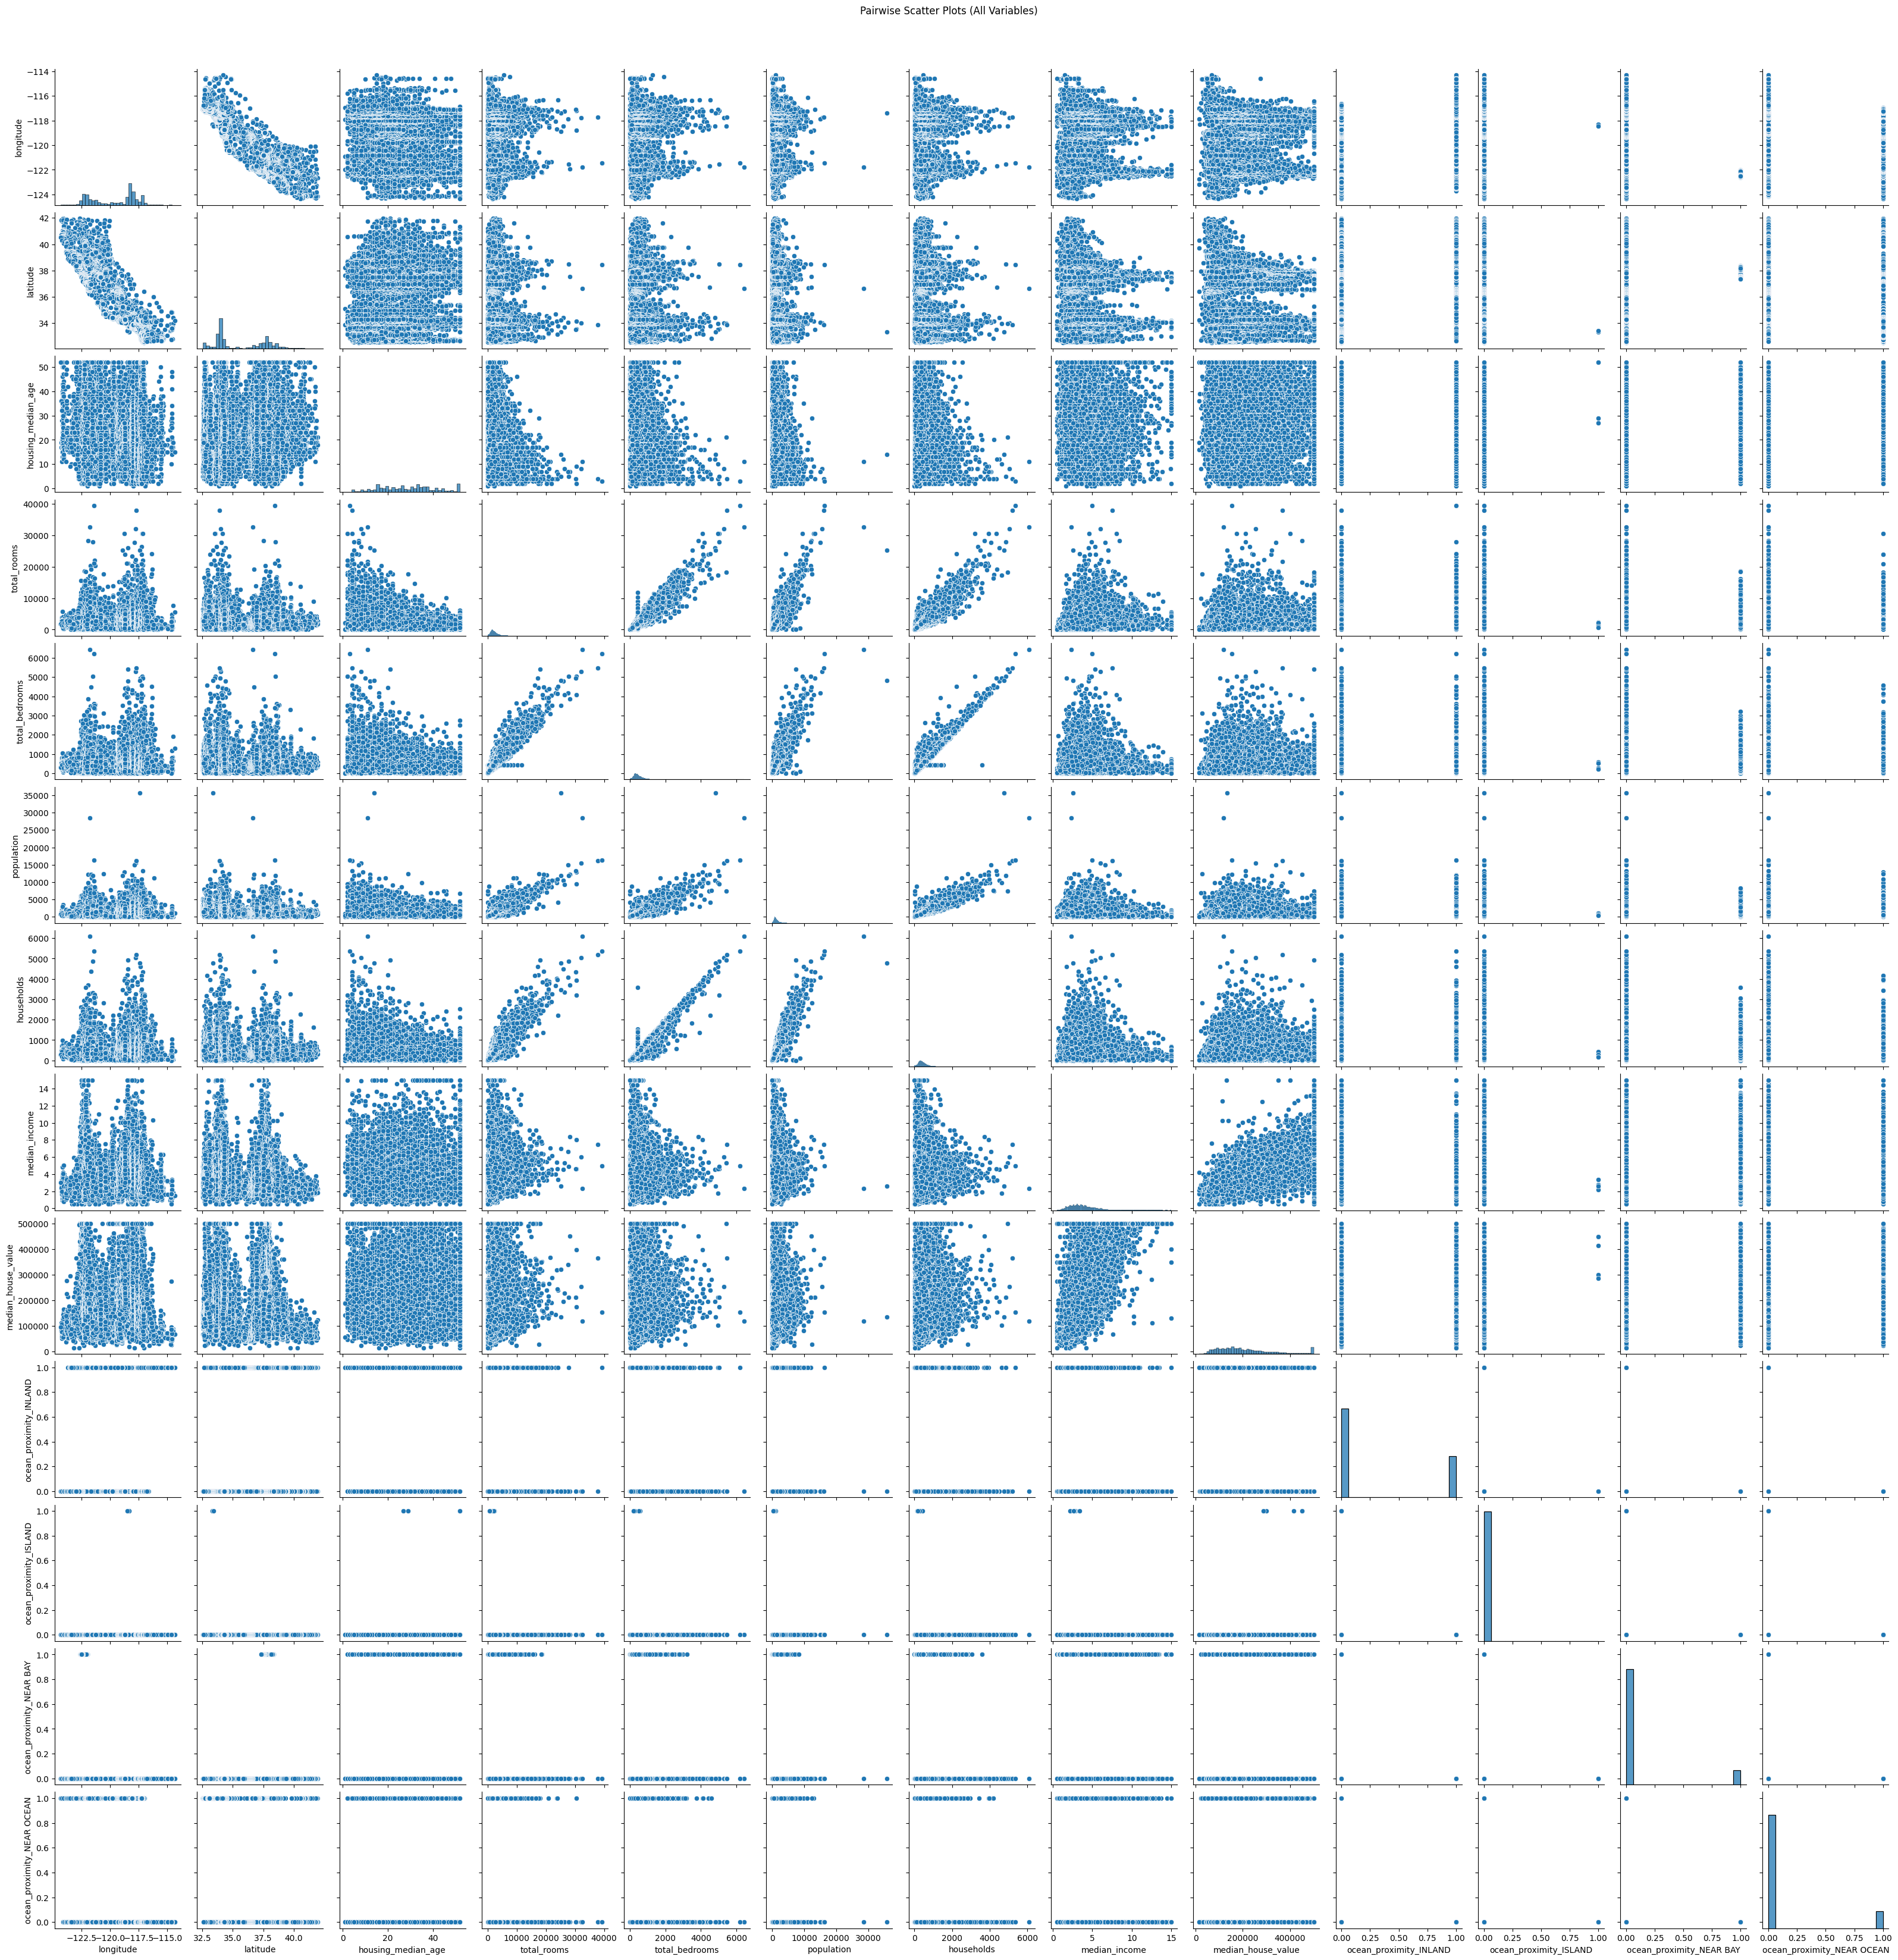

In [ ]:
# Make sure X_scaled is a DataFrame already (from earlier steps)

import seaborn as sns
import matplotlib.pyplot as plt


# Plot
sns.pairplot(data)
plt.suptitle('Pairwise Scatter Plots (All Variables)', y=1.02)
plt.show()



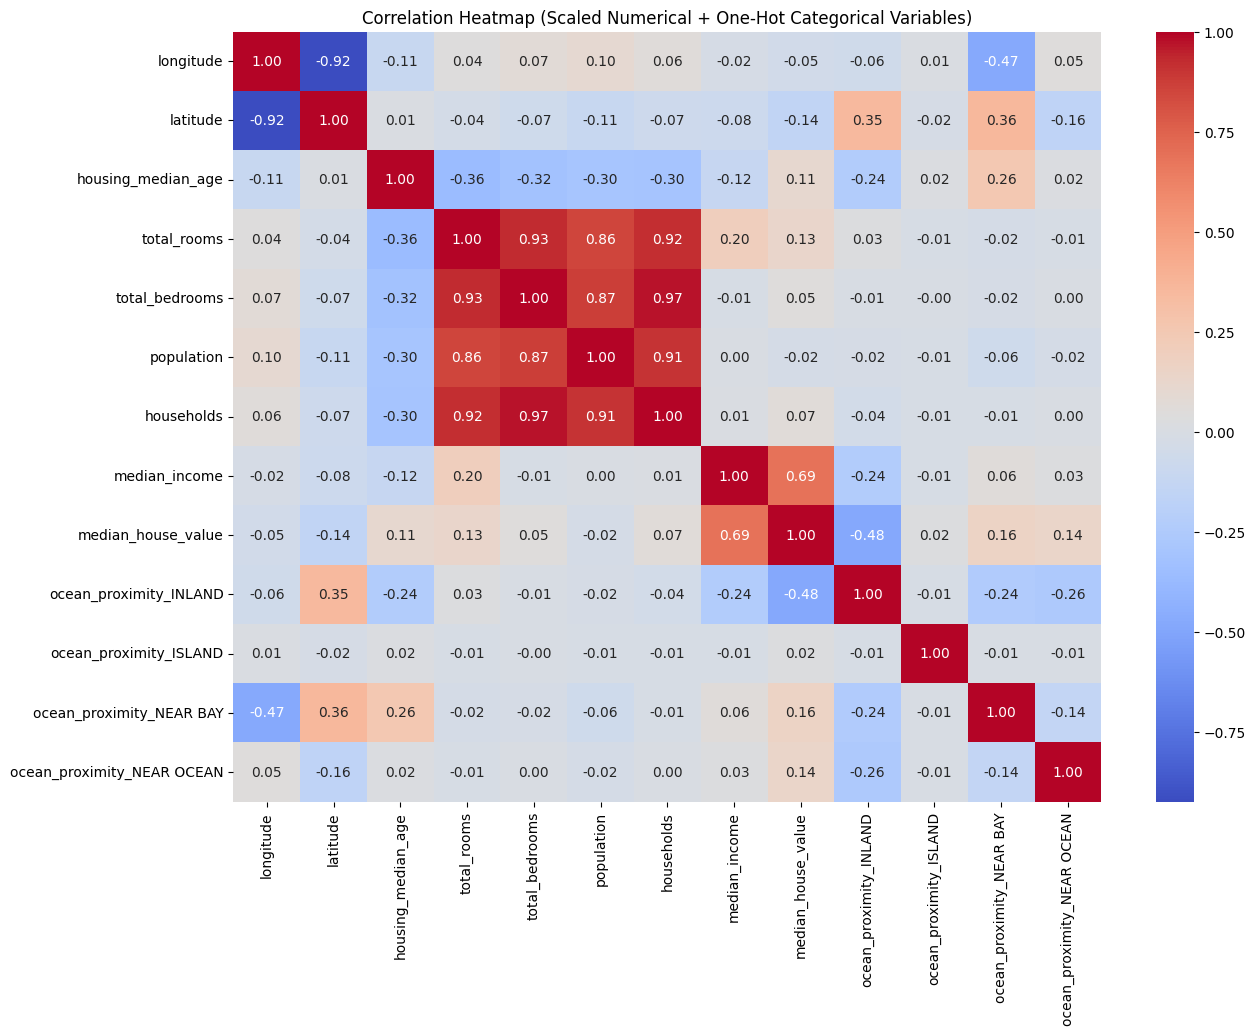

In [ ]:

# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the correlation heatmap
plt.figure(figsize=(14, 10))

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Scaled Numerical + One-Hot Categorical Variables)")
plt.show()


In [ ]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd





# 🎯 1. Load and preprocess
X = data.drop(columns='median_house_value')
y = data['median_house_value']

# ✅ 2. Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# 🔀 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🧠 4. Bayesian Ridge Regression
model = BayesianRidge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 📊 5. Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\n📈 Bayesian Ridge Regression (Numerical Features Normalized + One-Hot Features Preserved):")
print(f"✅ R² Score: {r2:.4f} ({r2 * 100:.2f}%)")
print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE: {mae:.2f}")




📈 Bayesian Ridge Regression (Numerical Features Normalized + One-Hot Features Preserved):
✅ R² Score: 0.6255 (62.55%)
📉 RMSE: 70049.92
📉 MAE: 50661.82


In [ ]:
# Import libraries
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd




# 🎯 1. Load and preprocess
X = data.drop(columns='median_house_value')
y = data['median_house_value']

# ✅ 2. Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# ➕ 3. Add polynomial features (degree 2) to numerical features only
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_numerical = poly.fit_transform(X_scaled)


# 🔀 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly_numerical, y, test_size=0.2, random_state=42)

# 🧠 6. Bayesian Ridge Regression
model = BayesianRidge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 📊 7. Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\n📈 Bayesian Ridge Regression (With Polynomial Features on Numerical Only):")
print(f"✅ R² Score: {r2:.4f} ({r2 * 100:.2f}%)")
print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE: {mae:.2f}")



📈 Bayesian Ridge Regression (With Polynomial Features on Numerical Only):
✅ R² Score: 0.6552 (65.52%)
📉 RMSE: 67216.52
📉 MAE: 46337.67


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd

# 🎯 1. Load and preprocess
X = data.drop(columns='median_house_value')
y = data['median_house_value']

# ✅ 2. Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ➕ 3. Add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# 🔀 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# 🧠 5. BNN-style MLPRegressor
bnn = MLPRegressor(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    alpha=0.001,          # L2 regularization ~ Bayesian prior
    max_iter=1000,
    random_state=42,
    early_stopping=True   # helps generalization
)

bnn.fit(X_train, y_train)
y_pred_bnn = bnn.predict(X_test)

# 📊 6. Evaluation
r2_bnn = r2_score(y_test, y_pred_bnn)
rmse_bnn = np.sqrt(mean_squared_error(y_test, y_pred_bnn))
mae_bnn = mean_absolute_error(y_test, y_pred_bnn)

print("\n🧠 BNN (MLPRegressor with Polynomial Features):")
print(f"✅ R² Score: {r2_bnn:.4f} ({r2_bnn * 100:.2f}%)")
print(f"📉 RMSE: {rmse_bnn:.2f}")
print(f"📉 MAE: {mae_bnn:.2f}")




🧠 BNN (MLPRegressor with Polynomial Features):
✅ R² Score: 0.7731 (77.31%)
📉 RMSE: 54529.89
📉 MAE: 36943.01
